Coefficient (slope): [-0.20208918]
Intercept: 0.5890308709011624


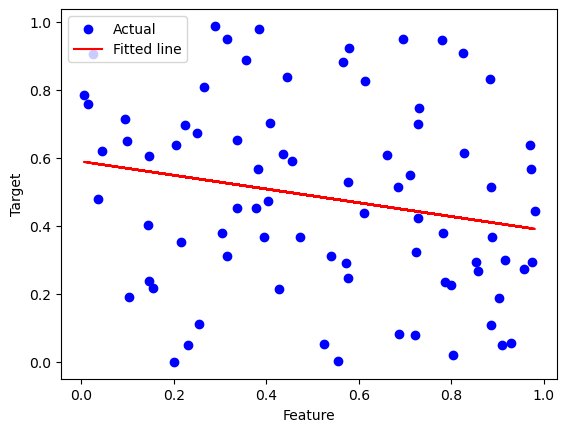

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def load_data():
    data = {
        'Feature': np.random.rand(100),  
        'Target': np.random.rand(100)    
    }
    df = pd.DataFrame(data)
    return df

def split_data(df, test_size=0.2, random_state=42):
    X = df[['Feature']] 
    y = df['Target']     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_linear_regression(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    return model, y_train_pred

def plot_regression_results(X_train, y_train, y_train_pred):
    plt.scatter(X_train, y_train, color='blue', label='Actual')
    plt.plot(X_train, y_train_pred, color='red', label='Fitted line')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    df = load_data()
    X_train, X_test, y_train, y_test = split_data(df)
    model, y_train_pred = train_linear_regression(X_train, y_train)
    slope = model.coef_
    intercept = model.intercept_
    print("Coefficient (slope):", slope)
    print("Intercept:", intercept)
    plot_regression_results(X_train, y_train, y_train_pred)


Metrics for Train set:
MSE: 0.0877
RMSE: 0.2962
MAPE: 3.3732
R2: 0.0075


Metrics for Test set:
MSE: 0.0962
RMSE: 0.3102
MAPE: 1.2006
R2: 0.0164




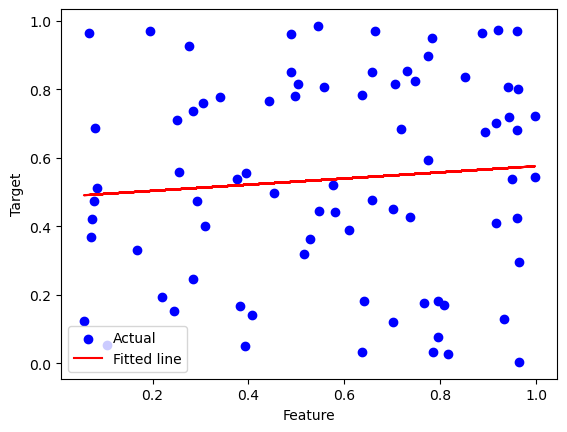

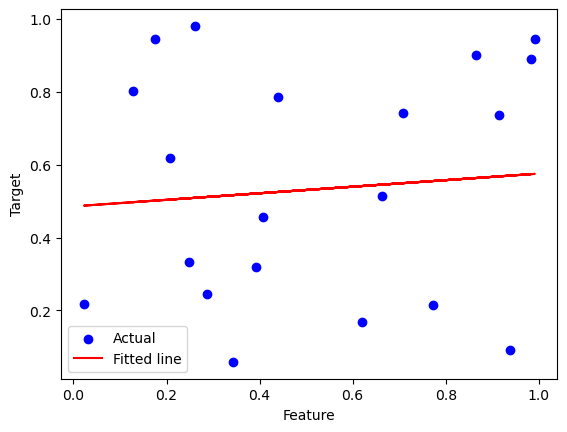

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }
    return metrics

def display_metrics(metrics, dataset_name):
   
    print(f"Metrics for {dataset_name} set:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    print("\n")

if __name__ == "__main__":
    df = load_data()

    X_train, X_test, y_train, y_test = split_data(df)

    model, y_train_pred = train_linear_regression(X_train, y_train)
    train_metrics = evaluate_model(y_train, y_train_pred)
    display_metrics(train_metrics, "Train")
    y_test_pred = model.predict(X_test)
    test_metrics = evaluate_model(y_test, y_test_pred)
    display_metrics(test_metrics, "Test")
    plot_regression_results(X_train, y_train, y_train_pred)
    plot_regression_results(X_test, y_test, y_test_pred)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_and_split_data(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1]  
    y = df.iloc[:, -1]   

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

def train_linear_regression(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    
    return model, y_train_pred

def evaluate_model(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }
    return metrics

def display_metrics(metrics, dataset_name):
    
    print(f"Metrics for {dataset_name} set:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    print("\n")

if __name__ == "__main__":
    file_path = r"C:/Users/Admin/Documents/Students_data.csv"
    
    X_train, X_test, y_train, y_test = load_and_split_data(file_path)
    model, y_train_pred = train_linear_regression(X_train, y_train)
    train_metrics = evaluate_model(y_train, y_train_pred)
    display_metrics(train_metrics, "Train")
    y_test_pred = model.predict(X_test)
    test_metrics = evaluate_model(y_test, y_test_pred)
    display_metrics(test_metrics, "Test")


Metrics for Train set:
MSE: 0.4925
RMSE: 0.7018
MAPE: 1248375936289601.5000
R2: 0.2703


Metrics for Test set:
MSE: 0.6148
RMSE: 0.7841
MAPE: 2348776115187055.0000
R2: 0.0247




In [7]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd

def load_and_split_data_for_clustering(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1] 
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    return X_train, X_test

def perform_kmeans_clustering(X_train, n_clusters=2, random_state=0):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto").fit(X_train)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    return kmeans, labels, cluster_centers
    
if __name__ == "__main__":
    file_path = r"C:/Users/Admin/Documents/Students_data.csv"
    X_train, X_test = load_and_split_data_for_clustering(file_path)
    kmeans, labels, cluster_centers = perform_kmeans_clustering(X_train, n_clusters=2)
    print("Cluster Labels for Training Data:\n", labels)
    print("\nCluster Centers:\n", cluster_centers)



Cluster Labels for Training Data:
 [1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 1 0 1 0 1]

Cluster Centers:
 [[1.17306122e+03 3.06122449e-01 3.46938776e-01 2.12244898e+00
  7.95944898e+01 6.87755102e+01 6.66122449e+01 7.04081633e+01
  7.97346939e+01 7.87755102e+01 7.53673469e+01 6.93265306e+01
  1.09183673e+01 6.53061224e-01 4.69387755e-01 5.30612245e-01]
 [1.22134286e+03 2.57142857e-01 2.57142857e-01 1.25714286e+00
  8.79094286e+01 8.61142857e+01 7.85428571e+01 9.00000000e+01
  9.30857143e+01 9.08000000e+01 8.83714286e+01 8.41428571e+01
  1.57428571e+01 7.14285714e-01 2.05714286e+00 3.42857143e-01]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import pandas as pd

def load_and_split_data_for_clustering(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1]  
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    return X_train, X_test

def perform_kmeans_clustering(X_train, n_clusters=2, random_state=0):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto").fit(X_train)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    return kmeans, labels, cluster_centers

def calculate_clustering_metrics(X_train, labels):
    silhouette = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)
    return silhouette, ch_score, db_index
    
if __name__ == "__main__":
    file_path = r"C:/Users/Admin/Documents/Students_data.csv"
    X_train, X_test = load_and_split_data_for_clustering(file_path)
    kmeans, labels, cluster_centers = perform_kmeans_clustering(X_train, n_clusters=2, random_state=42)
    silhouette, ch_score, db_index = calculate_clustering_metrics(X_train, labels)
    print("Cluster Labels for Training Data:\n", labels)
    print("\nCluster Centers:\n", cluster_centers)
    print("\nSilhouette Score:", silhouette)
    print("Calinski-Harabasz Score:", ch_score)
    print("Davies-Bouldin Index:", db_index)





Cluster Labels for Training Data:
 [0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 1 0 1 0]

Cluster Centers:
 [[1.22086111e+03 2.77777778e-01 2.50000000e-01 1.25000000e+00
  8.77183333e+01 8.57500000e+01 7.78333333e+01 8.99444444e+01
  9.29722222e+01 9.05277778e+01 8.80833333e+01 8.36944444e+01
  1.56388889e+01 7.22222222e-01 2.11111111e+00 3.33333333e-01]
 [1.17241667e+03 2.91666667e-01 3.54166667e-01 2.14583333e+00
  7.95645833e+01 6.86875000e+01 6.68958333e+01 7.00416667e+01
  7.95416667e+01 7.87291667e+01 7.53125000e+01 6.93541667e+01
  1.08958333e+01 6.45833333e-01 3.95833333e-01 5.41666667e-01]]

Silhouette Score: 0.39624494313709857
Calinski-Harabasz Score: 78.71161684327943
Davies-Bouldin Index: 0.9023766272493352


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

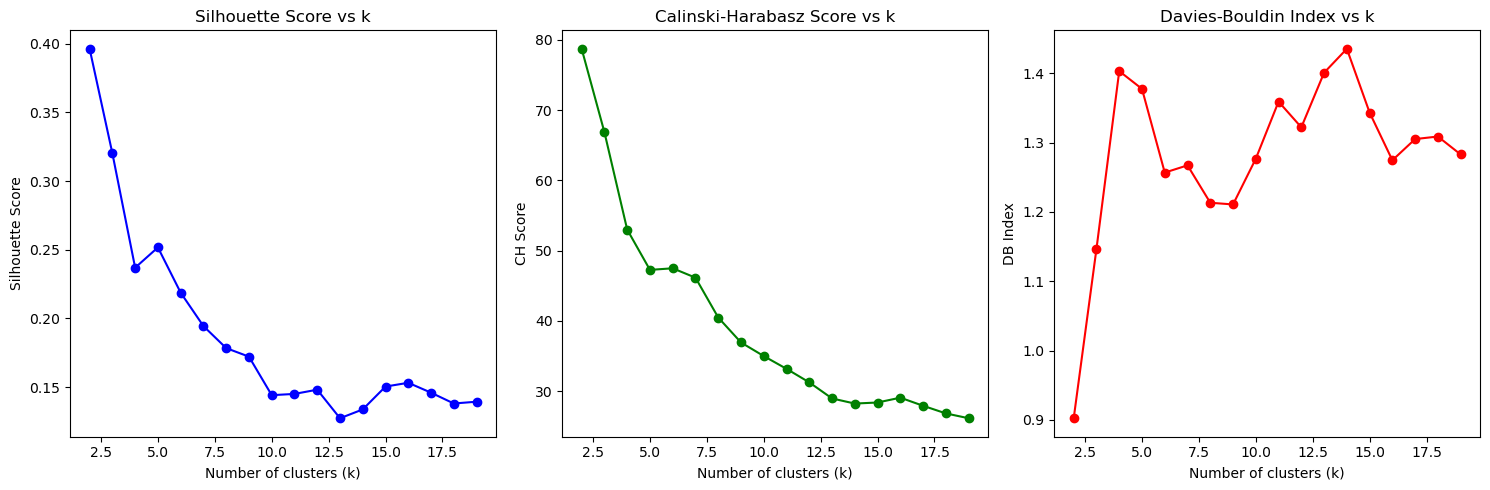

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import pandas as pd

def load_and_split_data_for_clustering(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    if df.empty:
        raise ValueError("The dataset is empty.")
    X = df.iloc[:, :-1] 
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    return X_train, X_test

def perform_kmeans_and_evaluate(X_train, k_values, random_state=42):
    results = {
        "k": [],
        "Silhouette": [],
        "CH": [],
        "DB": []
    }
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init="auto").fit(X_train)
        labels = kmeans.labels_
        silhouette = silhouette_score(X_train, labels)
        ch_score = calinski_harabasz_score(X_train, labels)
        db_index = davies_bouldin_score(X_train, labels)
        results["k"].append(k)
        results["Silhouette"].append(silhouette)
        results["CH"].append(ch_score)
        results["DB"].append(db_index)
    
    return results

def plot_clustering_metrics(results):
    plt.figure(figsize=(15, 5))

    # Silhouette Score Plot
    plt.subplot(1, 3, 1)
    plt.plot(results["k"], results["Silhouette"], marker='o', color='b')
    plt.title("Silhouette Score vs k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    
    # Calinski-Harabasz Score Plot
    plt.subplot(1, 3, 2)
    plt.plot(results["k"], results["CH"], marker='o', color='g')
    plt.title("Calinski-Harabasz Score vs k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("CH Score")
    
    # Davies-Bouldin Index Plot
    plt.subplot(1, 3, 3)
    plt.plot(results["k"], results["DB"], marker='o', color='r')
    plt.title("Davies-Bouldin Index vs k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("DB Index")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    file_path = r"C:/Users/Admin/Documents/Students_data.csv"
    X_train, X_test = load_and_split_data_for_clustering(file_path)
    k_values = range(2, 20)
    results = perform_kmeans_and_evaluate(X_train, k_values)
    plot_clustering_metrics(results)



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

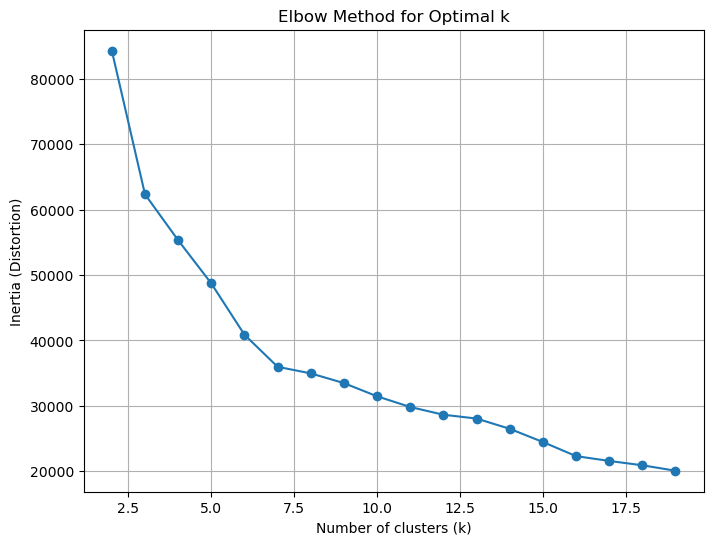

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data_for_clustering(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1]  # Assuming the last column is the target, which we ignore for clustering
    X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_state)
    return X_train, X_test

def perform_elbow_method(X_train, k_values, random_state=42):
    distortions = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init="auto").fit(X_train)
        distortions.append(kmeans.inertia_)  # Inertia measures within-cluster sum of squares
    return distortions

def plot_elbow_curve(k_values, distortions):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Distortion)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = r"C:/Users/Admin/Documents/Students_data.csv"
    X_train, X_test = load_and_split_data_for_clustering(file_path)
    k_values = range(2, 20)
    distortions = perform_elbow_method(X_train, k_values)
    plot_elbow_curve(k_values, distortions)
